# 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data

In [9]:
df = pd.read_csv('../data/raw/loan-data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [10]:
df.drop('Loan_ID', axis=1, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [12]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Looking for outliers

In [13]:
num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']

print(num_features)
print(cat_features)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History']


In [15]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


<Figure size 1800x1200 with 0 Axes>

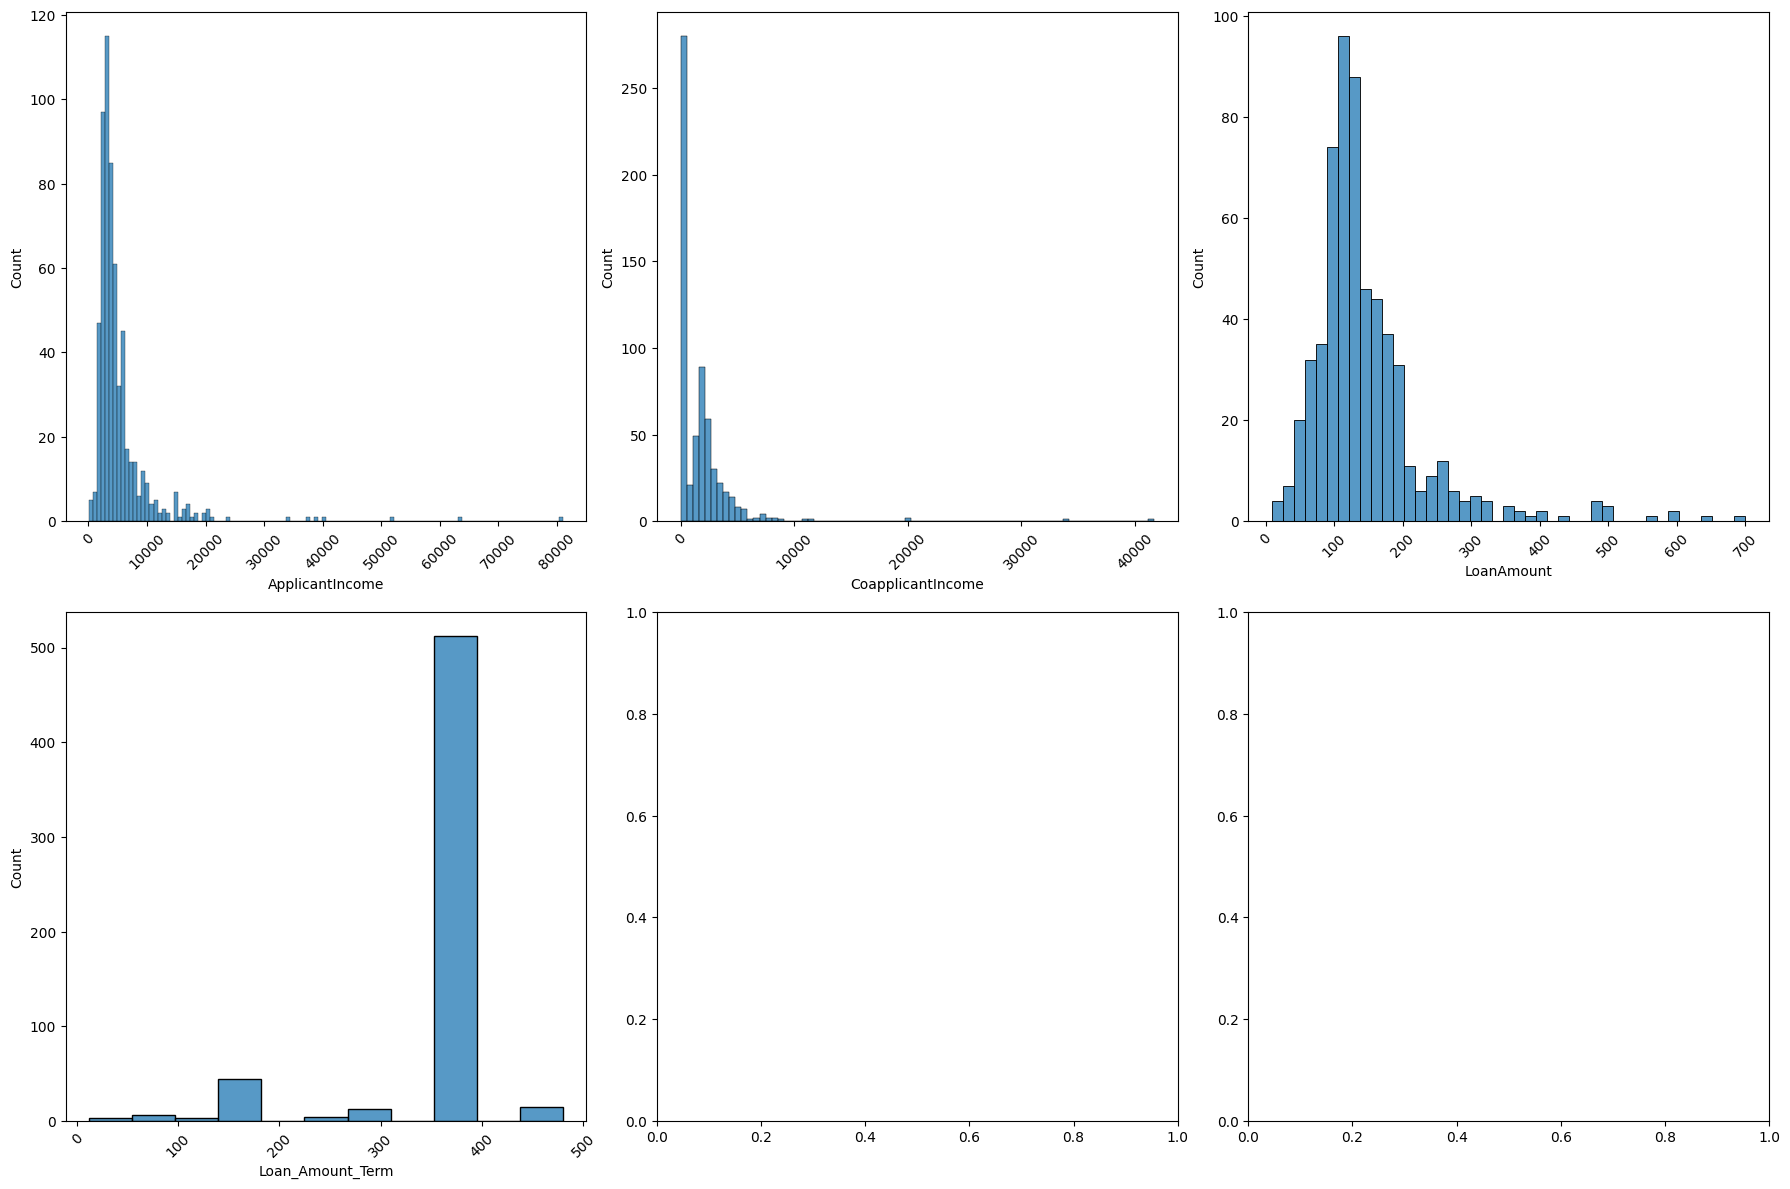

In [16]:
plt.figure(figsize=(18, 12))  # overall figure size
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # size of the subplots

axs = axs.flatten()

for i, col in enumerate(num_features):
    sns.histplot(df[col], ax=axs[i])
    axs[i].set_xlabel(col)  # Set x-axis label
    
    # Rotate x-axis labels if they are too long
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

<Figure size 1800x1200 with 0 Axes>

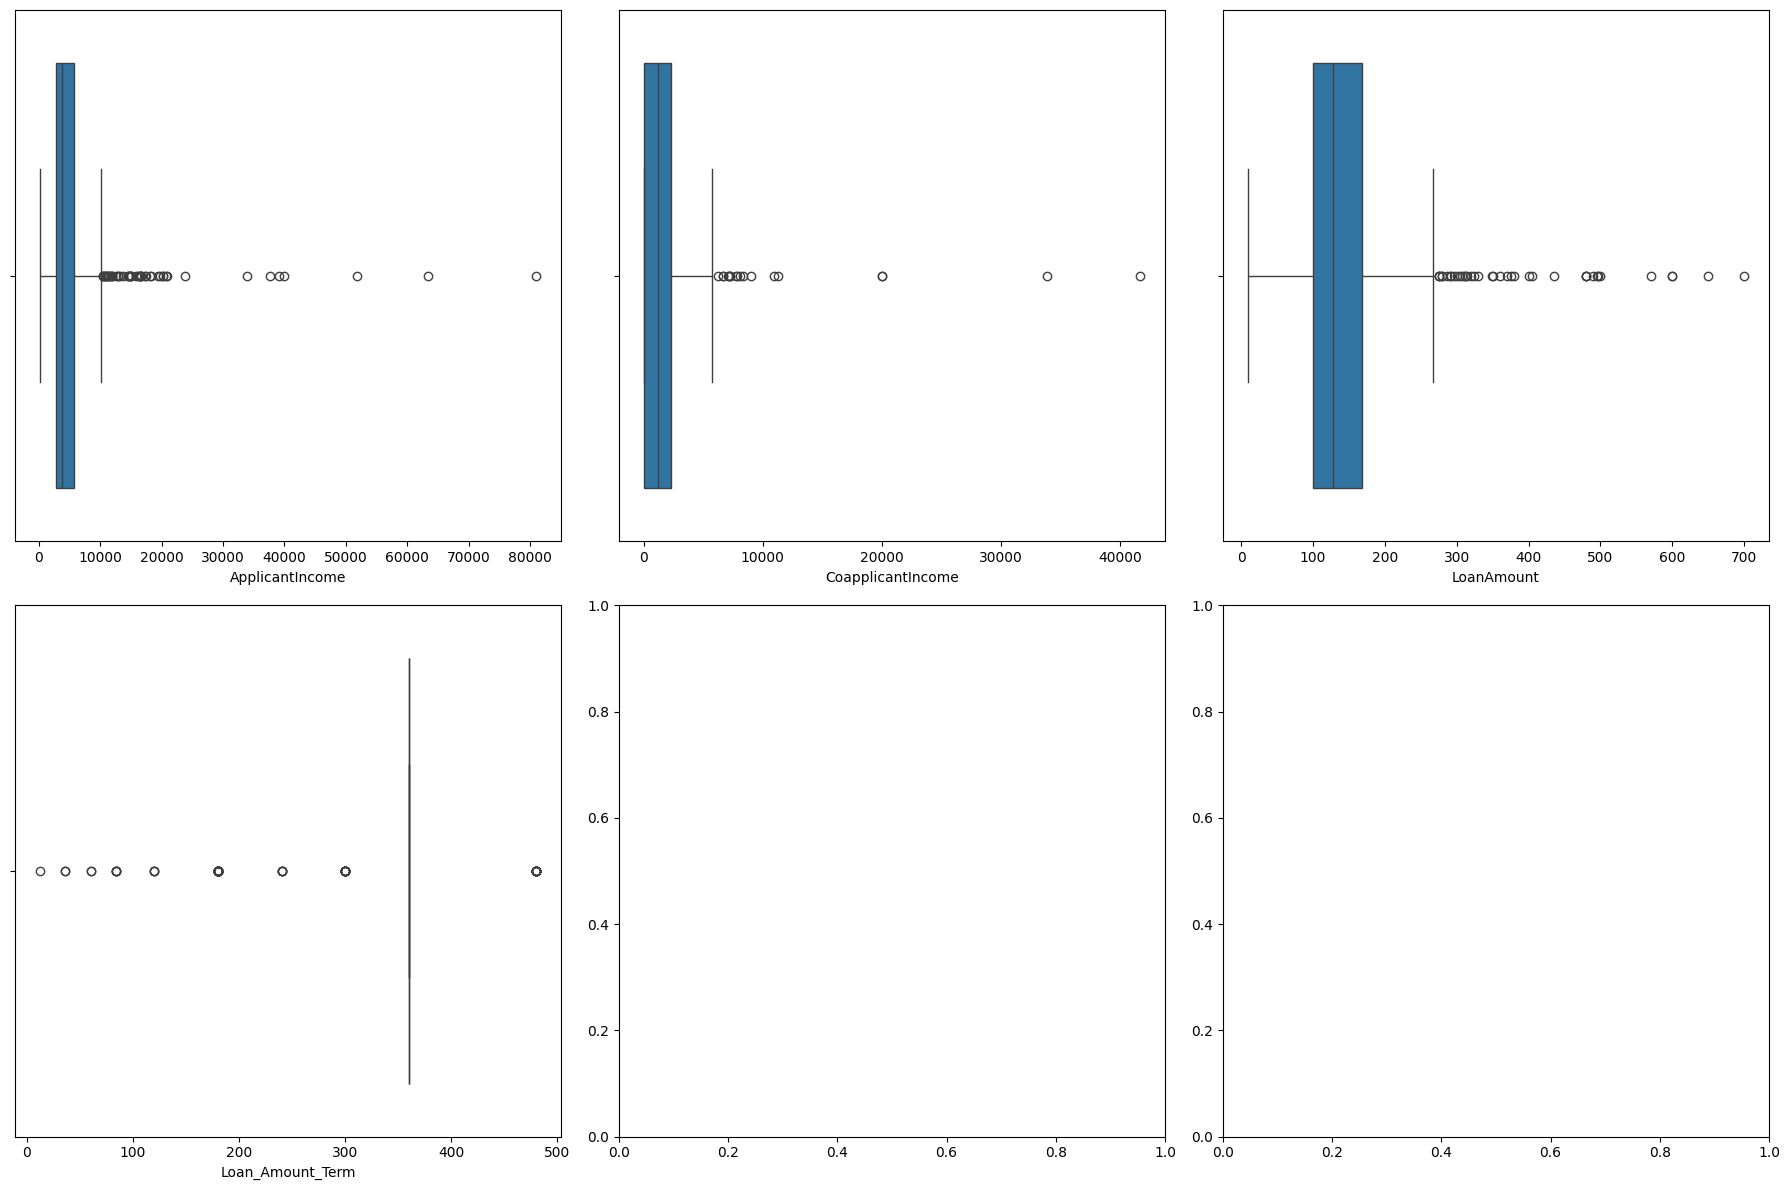

In [17]:

plt.figure(figsize=(18, 12))  # overall figure size
fig, axs = plt.subplots(2, 3, figsize=(18, 12))  # size of the subplots

axs = axs.flatten()

for i, col in enumerate(num_features):
    sns.boxplot(df[col], ax=axs[i], orient='h')
    axs[i].set_xlabel(col)  # Set x-axis label
    
    # Rotate x-axis labels if they are too long
    axs[i].tick_params(axis='x')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## Checking for class imbalance
The data is slightly imbalanced.

Approved Loan Ratio 31%


C:\Users\becaye.balde\AppData\Local\Temp\ipykernel_9000\302468861.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'Approved Loan Ratio {round(class_counts[1] / len(df) * 100)}%')


Text(0.5, 1.0, 'Loan Status: Approved VS Rejected')

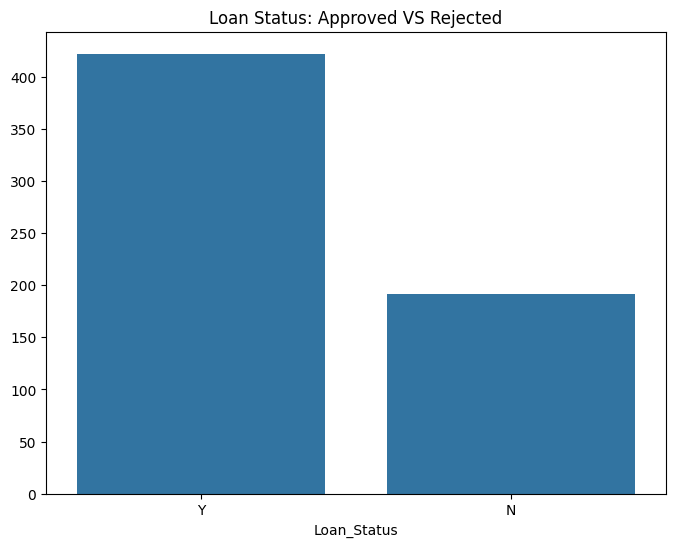

In [18]:
class_counts = df["Loan_Status"].value_counts()
print(f'Approved Loan Ratio {round(class_counts[1] / len(df) * 100)}%')

plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Loan Status: Approved VS Rejected')